In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

Bounds of the grid

In [3]:
XMIN = -3
XMAX = 3
YMIN = -3
YMAX = 3
STEP = 1

Create grid such that:
- $x$ range is $[-3, 3]$
- $y$ range is $[-3, 3]$
- step size is $1$

In [4]:
x_grid = np.arange(-3, 4)
y_grid = np.arange(-3, 4)
X, Y = np.meshgrid(x_grid, y_grid)

The circle is defined by the following equation

$$
x^2 + y^2 = 2.5^2
$$

In [5]:
def circle_function(x: float, y: float, r: float = 2.5) -> float:
    """Calculates the distance from the point `(x, y)` to the center
    of the circle `(0, 0)` with radius `r`.

    Args:
        x (float): x coordinate of the point
        y (float): y coordinate of the point
        r (float, optional): Radius of the circle. Defaults to 2.5.

    Returns:
        float: Distance from the point `(x, y)` to the center
    of the circle `(0, 0)` with radius `r`
    """
    return r - math.sqrt(x**2 + y**2)

In [6]:
def determine_signs(X, Y, inside_mask=X**2 + Y**2 <= 2.5**2):
    return X[inside_mask], Y[inside_mask], X[~inside_mask], Y[~inside_mask]

In [7]:
X_inside, Y_inside, X_outside, Y_outside = determine_signs(X, Y, inside_mask = X**2 + Y**2 <= 2.5**2)

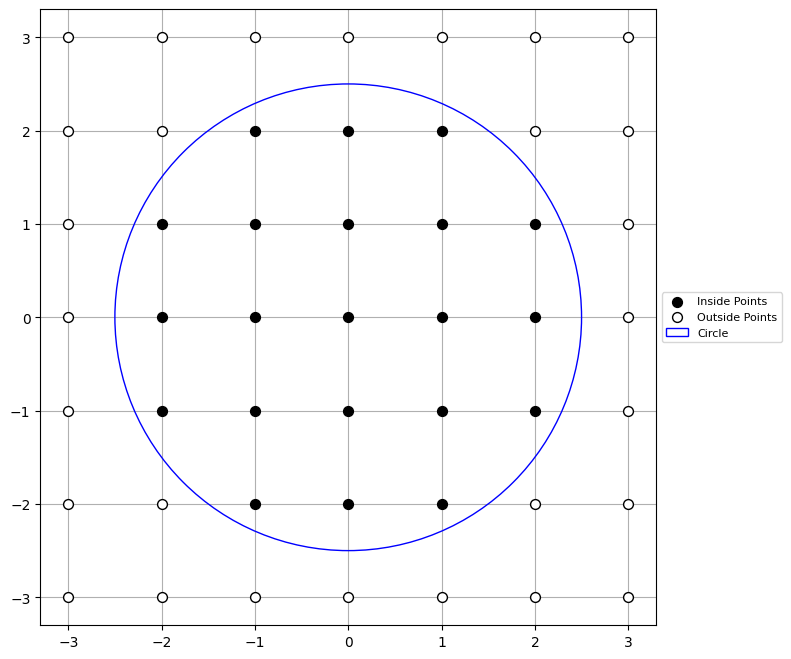

In [8]:
# Setup
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.grid(True)
# Plot grid points
ax.scatter(X_inside, Y_inside, color='black', s=50, label='Inside Points', zorder=2)
ax.scatter(X_outside, Y_outside, color='white', s=50, edgecolor='black', label='Outside Points', zorder=2)
circle = Circle((0, 0), 2.5, fill=False, color='blue', zorder=2, label="Circle")
ax.add_patch(circle)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
plt.show()

The circle is defined by

$$x^2 + y^2 = 2.5$$

In [9]:
x_grid

array([-3, -2, -1,  0,  1,  2,  3])

In [10]:
def find_intersections():
    # Find and plot intersection points
    intersections_x = []
    intersections_y = []
    normals = []

    # Vertical line intersections
    for x in x_grid:
        if abs(x) <= 2.5:
            y = np.sqrt(2.5**2 - x**2)
            intersections_x.extend([x, x])
            intersections_y.extend([y, -y])

    # Horizontal line intersections
    for y in y_grid:
        if abs(y) <= 2.5:
            x = np.sqrt(2.5**2 - y**2)
            intersections_x.extend([x, -x])
            intersections_y.extend([y, y])
            
    return intersections_x, intersections_y

In [11]:
intersections_x, intersections_y = find_intersections()

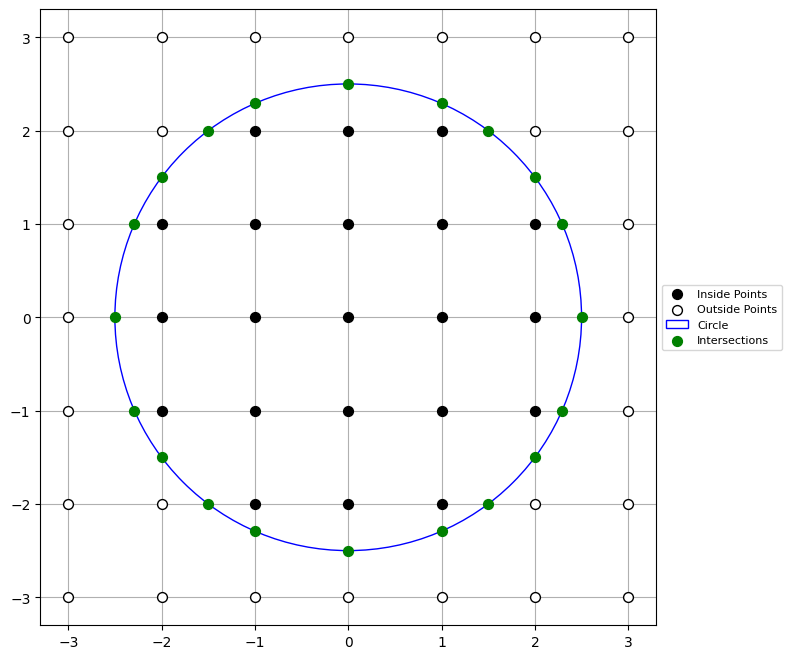

In [12]:
# Setup
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.grid(True)
# Plot grid points
ax.scatter(X_inside, Y_inside, color='black', s=50, label='Inside Points', zorder=2)
ax.scatter(X_outside, Y_outside, color='white', s=50, edgecolor='black', label='Outside Points', zorder=2)
circle = Circle((0, 0), 2.5, fill=False, color='blue', zorder=2, label="Circle")
ax.add_patch(circle)
ax.scatter(intersections_x, intersections_y, color='green', s=50, label='Intersections', zorder=2)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
plt.show()

In [13]:
def circle_normals(x, y):
    normaliser = np.sqrt(x**2 + y**2)
    return (-x/normaliser, -y/normaliser)

In [14]:
normals = []
for int_x, int_y in zip(intersections_x, intersections_y):
    normals.append(circle_normals(int_x, int_y))

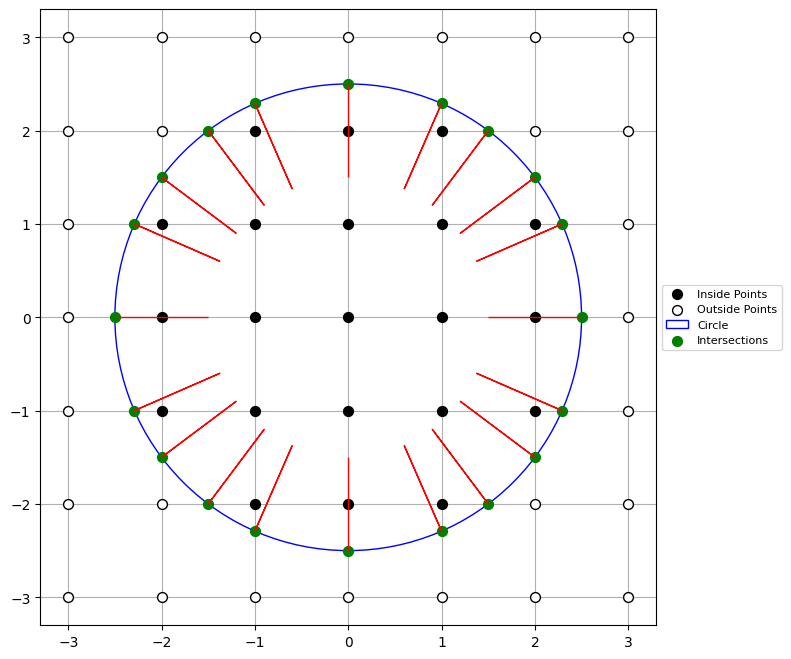

In [15]:
# Setup
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.grid(True)
# Plot grid points
ax.scatter(X_inside, Y_inside, color='black', s=50, label='Inside Points', zorder=2)
ax.scatter(X_outside, Y_outside, color='white', s=50, edgecolor='black', label='Outside Points', zorder=2)
circle = Circle((0, 0), 2.5, fill=False, color='blue', zorder=2, label="Circle")
ax.add_patch(circle)
ax.scatter(intersections_x, intersections_y, color='green', s=50, label='Intersections', zorder=2)
normal_length = 1
for x, y, normal in zip(intersections_x, intersections_y, normals):
    ax.arrow(x, y, normal[0] * normal_length, normal[1] * normal_length,
            head_width=0.0, head_length=0.0, fc='red', ec='red',
            length_includes_head=True, zorder=2)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
plt.show()

Now, it's time to solve the least squares problem defined in the paper.

In the 2D case, $A$ should be a $2 \times 2$ matrix, and $b$ a column vector of length $2$.

In [16]:
def comp_vert(intersections_x, intersections_y, normals):
    vertices = []
    # for each intersection point and corresponding normal
    # initialise A and b
    A = np.zeros((2, 2))
    b = np.zeros(2)
    for int_x, int_y, normal in zip(intersections_x, intersections_y, normals):
        A += np.outer([int_x, int_y], [int_x, int_y]) # This is actually A^T.A, producing a 2 by 2 matrix in the end
        scalar = normal[0] * int_x + normal[1] * int_y # This is the scalar b from the paper
        # print(scalar * np.array([normal[0], normal[1]]))
        b += scalar * np.array([normal[0], normal[1]]) # This is A^T.b from the paper
    
    # we should solve A*x = b for the matrices we just constructed 
    
    # Regularize if singular just in case
    epsilon = 1e-8
    A += epsilon * np.eye(2)    
    v = np.linalg.solve(A, b)
    vertices.append(v)
    return vertices
    

In [17]:
vertices = comp_vert(intersections_x, intersections_y, normals)

In [18]:
vertices

[array([0., 0.])]

AttributeError: 'list' object has no attribute 'values'

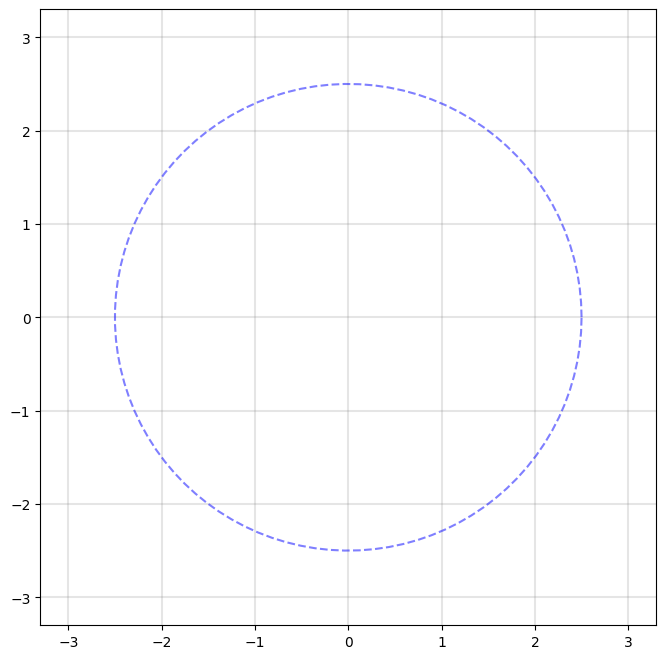

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')

# Plot grid
for x in np.arange(XMIN, XMAX + 1, 1):
    ax.axvline(x, color='gray', alpha=0.2)
for y in np.arange(XMIN, XMAX + 1, 1):
    ax.axhline(y, color='gray', alpha=0.2)

# Plot dual contouring edges
# if edges:
#     lc = LineCollection(edges, colors='red', linewidths=2)
#     ax.add_collection(lc)

# Plot exact circle for comparison
theta = np.linspace(0, 2*np.pi, 100)
ax.plot(2.5 * np.cos(theta), 2.5 * np.sin(theta), 
        '--', color='blue', alpha=0.5, label='Exact Circle')

# # Plot vertices
if vertices:
    vx, vy = zip(*vertices.values())
    ax.scatter(vx, vy, color='black', s=40, zorder=3, label='Dual Contouring Vertices')

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.legend()
plt.title(f"Dual Contouring for Circle (Radius = {2.5})")
plt.show()

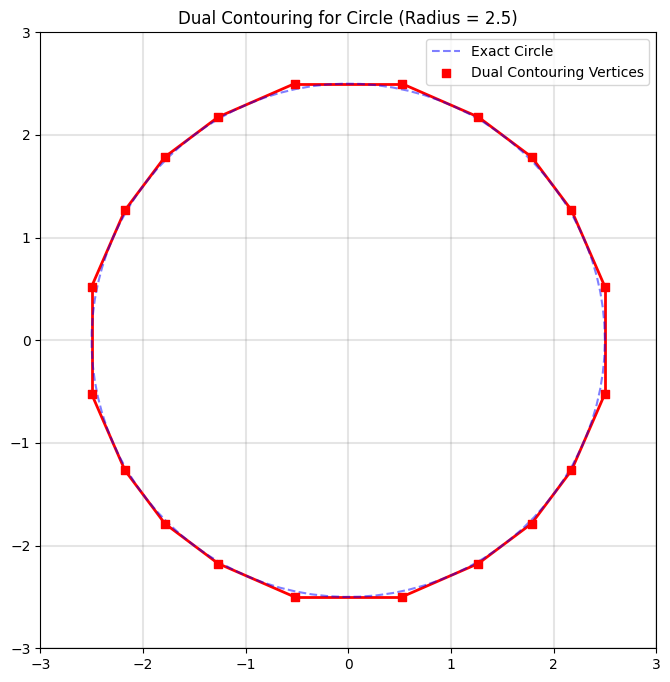

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Circle equation: x² + y² = 2.5²
RADIUS = 2.5

# Grid parameters
GRID_MIN = -3
GRID_MAX = 3
CELL_SIZE = 1

# --------------------------------------------------
# Step 1: Compute exact edge intersections and normals
# --------------------------------------------------
def compute_exact_intersections():
    cells = {}
    x_edges = np.arange(GRID_MIN, GRID_MAX + CELL_SIZE, CELL_SIZE)
    y_edges = np.arange(GRID_MIN, GRID_MAX + CELL_SIZE, CELL_SIZE)

    for i in range(len(x_edges)-1):
        for j in range(len(y_edges)-1):
            cell_x_min, cell_x_max = x_edges[i], x_edges[i+1]
            cell_y_min, cell_y_max = y_edges[j], y_edges[j+1]
            intersections = []
            normals = []

            # Check all 4 edges of the cell
            # Left edge (x=cell_x_min, y from cell_y_min to cell_y_max)
            x = cell_x_min
            if abs(x) <= RADIUS:
                y_val = np.sqrt(RADIUS**2 - x**2)
                if cell_y_min <= y_val <= cell_y_max:
                    intersections.append((x, y_val))
                    normals.append((x, y_val))
                if cell_y_min <= -y_val <= cell_y_max:
                    intersections.append((x, -y_val))
                    normals.append((x, -y_val))

            # Right edge (x=cell_x_max, y from cell_y_min to cell_y_max)
            x = cell_x_max
            if abs(x) <= RADIUS:
                y_val = np.sqrt(RADIUS**2 - x**2)
                if cell_y_min <= y_val <= cell_y_max:
                    intersections.append((x, y_val))
                    normals.append((x, y_val))
                if cell_y_min <= -y_val <= cell_y_max:
                    intersections.append((x, -y_val))
                    normals.append((x, -y_val))

            # Bottom edge (y=cell_y_min, x from cell_x_min to cell_x_max)
            y = cell_y_min
            if abs(y) <= RADIUS:
                x_val = np.sqrt(RADIUS**2 - y**2)
                if cell_x_min <= x_val <= cell_x_max:
                    intersections.append((x_val, y))
                    normals.append((x_val, y))
                if cell_x_min <= -x_val <= cell_x_max:
                    intersections.append((-x_val, y))
                    normals.append((-x_val, y))

            # Top edge (y=cell_y_max, x from cell_x_min to cell_x_max)
            y = cell_y_max
            if abs(y) <= RADIUS:
                x_val = np.sqrt(RADIUS**2 - y**2)
                if cell_x_min <= x_val <= cell_x_max:
                    intersections.append((x_val, y))
                    normals.append((x_val, y))
                if cell_x_min <= -x_val <= cell_x_max:
                    intersections.append((-x_val, y))
                    normals.append((-x_val, y))

            # Normalize normals
            normals = [np.array(n) / np.linalg.norm(n) for n in normals]
            # print(normals)
            cells[(i, j)] = {'intersections': intersections, 'normals': normals}
    
    return cells

# --------------------------------------------------
# Step 2: Solve least squares for vertex positions (FIXED)
# --------------------------------------------------
def compute_vertices(cells):
    vertices = {}
    for (i, j), data in cells.items():
        if len(data['intersections']) == 0:
            continue
        
        # Build A and b for least squares
        A = np.zeros((2, 2))
        b = np.zeros(2)
        
        for (x, y), n in zip(data['intersections'], data['normals']):
            nx, ny = n
            A += np.outer([nx, ny], [nx, ny])
            # FIX: Directly compute (n_i ⋅ x_i) * n_i
            scalar = nx * x + ny * y
            b += scalar * np.array([nx, ny])
        
        # Regularize if singular
        epsilon = 1e-8
        A += epsilon * np.eye(2)
        
        try:
            v = np.linalg.solve(A, b)
            vertices[(i, j)] = v
        except np.linalg.LinAlgError:
            pass
    
    return vertices

# --------------------------------------------------
# Step 3: Resolve connectivity
# --------------------------------------------------
def compute_edges(vertices):
    edges = []
    
    # Check horizontal connections (shared vertical edges)
    for i in range(int((GRID_MAX - GRID_MIN)/CELL_SIZE)):
        for j in range(int((GRID_MAX - GRID_MIN)/CELL_SIZE)):
            if (i, j) in vertices and (i+1, j) in vertices:
                edges.append([vertices[(i, j)], vertices[(i+1, j)]])
    
    # Check vertical connections (shared horizontal edges)
    for i in range(int((GRID_MAX - GRID_MIN)/CELL_SIZE)):
        for j in range(int((GRID_MAX - GRID_MIN)/CELL_SIZE)):
            if (i, j) in vertices and (i, j+1) in vertices:
                edges.append([vertices[(i, j)], vertices[(i, j+1)]])
    
    return edges

# --------------------------------------------------
# Execute pipeline
# --------------------------------------------------
cells = compute_exact_intersections()
vertices = compute_vertices(cells)
edges = compute_edges(vertices)

# --------------------------------------------------
# Plotting with matplotlib
# --------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')

# Plot grid
for x in np.arange(GRID_MIN, GRID_MAX + CELL_SIZE, CELL_SIZE):
    ax.axvline(x, color='gray', alpha=0.2)
for y in np.arange(GRID_MIN, GRID_MAX + CELL_SIZE, CELL_SIZE):
    ax.axhline(y, color='gray', alpha=0.2)

# Plot dual contouring edges
if edges:
    lc = LineCollection(edges, colors='red', linewidths=2)
    ax.add_collection(lc)

# Plot exact circle for comparison
theta = np.linspace(0, 2*np.pi, 100)
ax.plot(RADIUS * np.cos(theta), RADIUS * np.sin(theta), 
        '--', color='blue', alpha=0.5, label='Exact Circle')

# Plot vertices
if vertices:
    vx, vy = zip(*vertices.values())
    ax.scatter(vx, vy, color='red', s=40, zorder=3, label='Dual Contouring Vertices', marker="s")

ax.set_xlim(GRID_MIN, GRID_MAX)
ax.set_ylim(GRID_MIN, GRID_MAX)
ax.legend()
plt.title(f"Dual Contouring for Circle (Radius = {RADIUS})")
plt.show()

In [21]:
import numpy as np
import plotly.graph_objects as go

# Sphere equation: x² + y² + z² = 2.5²
RADIUS = 2.5

# Grid parameters
GRID_MIN = -3
GRID_MAX = 3
CELL_SIZE = 1

# --------------------------------------------------
# Step 1: Compute exact edge intersections and normals
# --------------------------------------------------
def compute_exact_intersections_3d():
    cells = {}
    x_edges = np.arange(GRID_MIN, GRID_MAX + CELL_SIZE, CELL_SIZE)
    y_edges = np.arange(GRID_MIN, GRID_MAX + CELL_SIZE, CELL_SIZE)
    z_edges = np.arange(GRID_MIN, GRID_MAX + CELL_SIZE, CELL_SIZE)

    for i in range(len(x_edges)-1):
        for j in range(len(y_edges)-1):
            for k in range(len(z_edges)-1):
                cell_x_min, cell_x_max = x_edges[i], x_edges[i+1]
                cell_y_min, cell_y_max = y_edges[j], y_edges[j+1]
                cell_z_min, cell_z_max = z_edges[k], z_edges[k+1]
                intersections = []
                normals = []

                # Check all 12 edges of the cell
                # Edge along x-axis (fixed y, z)
                for y in [cell_y_min, cell_y_max]:
                    for z in [cell_z_min, cell_z_max]:
                        x_vals = np.sqrt(RADIUS**2 - y**2 - z**2 + 1e-8)  # Avoid sqrt(negative)
                        x_vals = np.real(x_vals)  # Ignore complex results
                        for x in [x_vals, -x_vals]:
                            if cell_x_min <= x <= cell_x_max:
                                intersections.append((x, y, z))
                                normals.append((x, y, z))

                # Edge along y-axis (fixed x, z)
                for x in [cell_x_min, cell_x_max]:
                    for z in [cell_z_min, cell_z_max]:
                        y_vals = np.sqrt(RADIUS**2 - x**2 - z**2 + 1e-8)
                        y_vals = np.real(y_vals)
                        for y in [y_vals, -y_vals]:
                            if cell_y_min <= y <= cell_y_max:
                                intersections.append((x, y, z))
                                normals.append((x, y, z))

                # Edge along z-axis (fixed x, y)
                for x in [cell_x_min, cell_x_max]:
                    for y in [cell_y_min, cell_y_max]:
                        z_vals = np.sqrt(RADIUS**2 - x**2 - y**2 + 1e-8)
                        z_vals = np.real(z_vals)
                        for z in [z_vals, -z_vals]:
                            if cell_z_min <= z <= cell_z_max:
                                intersections.append((x, y, z))
                                normals.append((x, y, z))

                # Normalize normals
                normals = [np.array(n) / np.linalg.norm(n) for n in normals]
                cells[(i, j, k)] = {'intersections': intersections, 'normals': normals}
    
    return cells

# --------------------------------------------------
# Step 2: Solve least squares for vertex positions
# --------------------------------------------------
def compute_vertices_3d(cells):
    vertices = {}
    for (i, j, k), data in cells.items():
        if len(data['intersections']) == 0:
            continue
        
        # Build A and b for least squares
        A = np.zeros((3, 3))
        b = np.zeros(3)
        
        for (x, y, z), n in zip(data['intersections'], data['normals']):
            nx, ny, nz = n
            A += np.outer([nx, ny, nz], [nx, ny, nz])
            scalar = nx * x + ny * y + nz * z
            b += scalar * np.array([nx, ny, nz])
        
        # Regularize if singular
        epsilon = 1e-8
        A += epsilon * np.eye(3)
        
        try:
            v = np.linalg.solve(A, b)
            vertices[(i, j, k)] = v
        except np.linalg.LinAlgError:
            pass
    
    return vertices

# --------------------------------------------------
# Step 3: Resolve connectivity (edges between adjacent cells)
# --------------------------------------------------
def compute_edges_3d(vertices):
    edges = []
    for (i, j, k) in vertices:
        # Check neighbors in x, y, z directions
        for di, dj, dk in [(1, 0, 0), (0, 1, 0), (0, 0, 1)]:
            neighbor_key = (i + di, j + dj, k + dk)
            if neighbor_key in vertices:
                edges.append([vertices[(i, j, k)], vertices[neighbor_key]])
    return edges

# --------------------------------------------------
# Execute pipeline
# --------------------------------------------------
cells = compute_exact_intersections_3d()
vertices = compute_vertices_3d(cells)
edges = compute_edges_3d(vertices)

# --------------------------------------------------
# Plotting with Plotly
# --------------------------------------------------
fig = go.Figure()

# Plot vertices
if vertices:
    vx, vy, vz = zip(*vertices.values())
    fig.add_trace(go.Scatter3d(
        x=vx, y=vy, z=vz,
        mode='markers',
        marker=dict(size=3, color='red'),
        name='Vertices'
    ))

# Plot edges
if edges:
    for edge in edges:
        x, y, z = zip(*edge)
        fig.add_trace(go.Scatter3d(
            x=x, y=y, z=z,
            mode='lines',
            line=dict(color='blue', width=2),
            showlegend=False
        ))

# Plot exact sphere for comparison
theta = np.linspace(0, 2*np.pi, 50)
phi = np.linspace(0, np.pi, 50)
x_sphere = RADIUS * np.outer(np.cos(theta), np.sin(phi)).flatten()
y_sphere = RADIUS * np.outer(np.sin(theta), np.sin(phi)).flatten()
z_sphere = RADIUS * np.outer(np.ones(50), np.cos(phi)).flatten()

fig.add_trace(go.Scatter3d(
    x=x_sphere, y=y_sphere, z=z_sphere,
    mode='markers',
    marker=dict(size=1, color='rgba(0, 0, 255, 0.1)'),
    name='Exact Sphere'
))

fig.update_layout(
    scene=dict(
        xaxis=dict(range=[GRID_MIN, GRID_MAX]),
        yaxis=dict(range=[GRID_MIN, GRID_MAX]),
        zaxis=dict(range=[GRID_MIN, GRID_MAX]),
        aspectmode='cube'
    ),
    # title='Dual Contouring for Sphere (Radius = 2.5)'
)

fig.show()

/var/folders/r0/6h61qg4157lcdfpct0nslmd40000gn/T/ipykernel_3641/3524254102.py:34: RuntimeWarning: invalid value encountered in sqrt
  x_vals = np.sqrt(RADIUS**2 - y**2 - z**2 + 1e-8)  # Avoid sqrt(negative)
/var/folders/r0/6h61qg4157lcdfpct0nslmd40000gn/T/ipykernel_3641/3524254102.py:44: RuntimeWarning: invalid value encountered in sqrt
  y_vals = np.sqrt(RADIUS**2 - x**2 - z**2 + 1e-8)
/var/folders/r0/6h61qg4157lcdfpct0nslmd40000gn/T/ipykernel_3641/3524254102.py:54: RuntimeWarning: invalid value encountered in sqrt
  z_vals = np.sqrt(RADIUS**2 - x**2 - y**2 + 1e-8)


In [4]:
# import numpy as np
# import plotly.graph_objects as go
# from skimage.measure import marching_cubes

# # Sphere equation: x² + y² + z² = 2.5²
# RADIUS = 2.5

# # Grid parameters
# GRID_MIN = -3
# GRID_MAX = 3
# CELL_SIZE = 0.5  # Smaller cell size improves accuracy

# # --------------------------------------------------
# # Step 1: Create a 3D grid of function values
# # --------------------------------------------------
# x = np.arange(GRID_MIN, GRID_MAX + CELL_SIZE, CELL_SIZE)
# y = np.arange(GRID_MIN, GRID_MAX + CELL_SIZE, CELL_SIZE)
# z = np.arange(GRID_MIN, GRID_MAX + CELL_SIZE, CELL_SIZE)
# xx, yy, zz = np.meshgrid(x, y, z, indexing='ij')
# sphere_func = xx**2 + yy**2 + zz**2 - RADIUS**2

# # --------------------------------------------------
# # Step 2: Run Marching Cubes
# # --------------------------------------------------
# vertices, faces, _, _ = marching_cubes(
#     sphere_func, 
#     level=0, 
#     spacing=(CELL_SIZE, CELL_SIZE, CELL_SIZE)
# )

# # Adjust vertex coordinates to the grid's origin
# vertices = vertices + np.array([GRID_MIN, GRID_MIN, GRID_MIN])

# # --------------------------------------------------
# # Step 3: Plot with Plotly
# # --------------------------------------------------
# fig = go.Figure()

# # Marching Cubes mesh
# fig.add_trace(go.Mesh3d(
#     x=vertices[:, 0],
#     y=vertices[:, 1],
#     z=vertices[:, 2],
#     i=faces[:, 0],
#     j=faces[:, 1],
#     k=faces[:, 2],
#     opacity=0.5,
#     color='blue',
#     name='Marching Cubes Mesh'
# ))

# # Exact sphere for comparison
# theta = np.linspace(0, 2*np.pi, 50)
# phi = np.linspace(0, np.pi, 50)
# x_sphere = RADIUS * np.outer(np.cos(theta), np.sin(phi)).flatten()
# y_sphere = RADIUS * np.outer(np.sin(theta), np.sin(phi)).flatten()
# z_sphere = RADIUS * np.outer(np.ones(50), np.cos(phi)).flatten()

# fig.add_trace(go.Scatter3d(
#     x=x_sphere, y=y_sphere, z=z_sphere,
#     mode='markers',
#     marker=dict(size=1, color='red', opacity=0.1),
#     name='Exact Sphere'
# ))

# fig.update_layout(
#     scene=dict(
#         xaxis=dict(range=[GRID_MIN, GRID_MAX]),
#         yaxis=dict(range=[GRID_MIN, GRID_MAX]),
#         zaxis=dict(range=[GRID_MIN, GRID_MAX]),
#         aspectmode='cube'
#     ),
#     title=f'Marching Cubes for Sphere (Radius = {RADIUS})'
# )

# fig.show()

ModuleNotFoundError: No module named 'skimage'

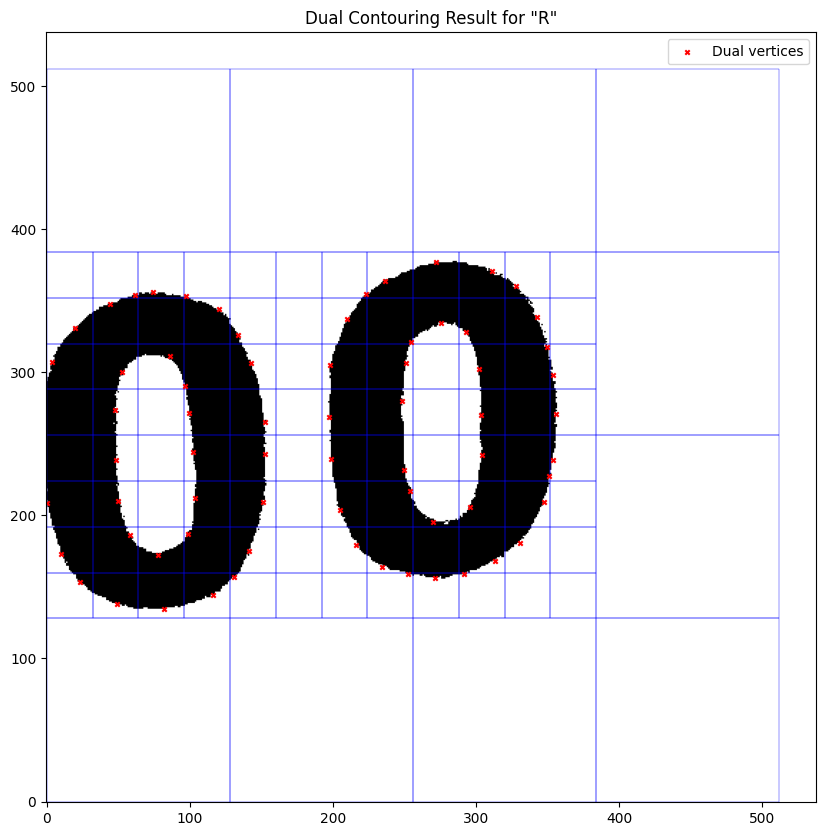

In [24]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import sobel

# 1. Load and binarize the image
image = np.array(Image.open('ids_0049.jpg').convert('L'))  # Replace with your image
binary = (image > 128).astype(int)  # 0=inside, 1=outside

# 2. Compute gradients for normals
grad_x = sobel(binary.astype(float), axis=1)
grad_y = sobel(binary.astype(float), axis=0)
norms = np.sqrt(grad_x**2 + grad_y**2 + 1e-8)
grad_x /= norms
grad_y /= norms

# 3. Quadtree implementation
class QuadtreeNode:
    def __init__(self, x, y, size, depth=0):
        self.x = x
        self.y = y
        self.size = size
        self.depth = depth
        self.children = None
        self.vertex = None  # Dual contouring vertex

    def subdivide(self, max_depth):
        if self.depth >= max_depth or self.size == 1:
            return
        x, y, size = self.x, self.y, self.size
        region = binary[y:y+size, x:x+size]
        if np.any(region != region[0,0]):
            half = size // 2
            self.children = [
                QuadtreeNode(x, y, half, self.depth+1),
                QuadtreeNode(x+half, y, half, self.depth+1),
                QuadtreeNode(x, y+half, half, self.depth+1),
                QuadtreeNode(x+half, y+half, half, self.depth+1)
            ]
            for child in self.children:
                child.subdivide(max_depth)

def interpolate_normal(x, y, grad_x, grad_y):
    x0, y0 = int(np.floor(x)), int(np.floor(y))
    dx, dy = x - x0, y - y0
    if x0+1 >= grad_x.shape[1] or y0+1 >= grad_x.shape[0]:
        return np.array([0.0, 0.0])
    return (1-dx)*(1-dy)*np.array([grad_x[y0,x0], grad_y[y0,x0]]) + \
           dx*(1-dy)*np.array([grad_x[y0,x0+1], grad_y[y0,x0+1]]) + \
           (1-dx)*dy*np.array([grad_x[y0+1,x0], grad_y[y0+1,x0]]) + \
           dx*dy*np.array([grad_x[y0+1,x0+1], grad_y[y0+1,x0+1]])

# 4. Build quadtree and compute vertices
max_depth = 4
root = QuadtreeNode(0, 0, binary.shape[0])
root.subdivide(max_depth)

# Collect leaves and compute vertices
leaves = []
def collect_leaves(node):
    if node.children is None:
        leaves.append(node)
    else:
        for child in node.children:
            collect_leaves(child)
collect_leaves(root)

for leaf in leaves:
    intersections = []
    x, y, size = leaf.x, leaf.y, leaf.size
    
    # Check all pixel edges in the leaf
    for j in range(y, y+size):
        for i in range(x, x+size):
            # Right edge
            if i+1 < binary.shape[1]:
                if binary[j,i] != binary[j,i+1]:
                    mid_x, mid_y = i+0.5, j
                    normal = interpolate_normal(mid_x, mid_y, grad_x, grad_y)
                    if binary[j,i] == 0: normal *= -1
                    intersections.append((np.array([mid_x, mid_y]), normal))
            # Bottom edge
            if j+1 < binary.shape[0]:
                if binary[j,i] != binary[j+1,i]:
                    mid_x, mid_y = i, j+0.5
                    normal = interpolate_normal(mid_x, mid_y, grad_x, grad_y)
                    if binary[j,i] == 0: normal *= -1
                    intersections.append((np.array([mid_x, mid_y]), normal))

    # Solve QEF
    if intersections:
        A = np.array([n for _, n in intersections])
        b = np.array([np.dot(n, p) for p, n in intersections])
        try:
            leaf.vertex = np.linalg.lstsq(A, b, rcond=None)[0]
        except:
            leaf.vertex = None

# 5. Visualization
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(binary, cmap='gray', origin='lower')

# Plot quadtree
def draw_quadtree(node):
    if node.children:
        for child in node.children:
            draw_quadtree(child)
    else:
        rect = plt.Rectangle((node.x, node.y), node.size, node.size, 
                            fill=False, edgecolor='blue', linewidth=0.3)
        ax.add_patch(rect)
draw_quadtree(root)

# Plot vertices
vertices = np.array([leaf.vertex for leaf in leaves if leaf.vertex is not None])
ax.scatter(vertices[:,0], vertices[:,1], s=10, c='red', 
          marker='x', label='Dual vertices')

# Simple mesh connection (illustrative)
for i in range(len(vertices)):
    for j in range(i+1, len(vertices)):
        if np.linalg.norm(vertices[i] - vertices[j]) < 5:  # Threshold
            ax.plot([vertices[i][0], vertices[j][0]], 
                   [vertices[i][1], vertices[j][1]], 'r-', lw=0.5)

plt.title('Dual Contouring Result for "R"')
plt.legend()
plt.show()

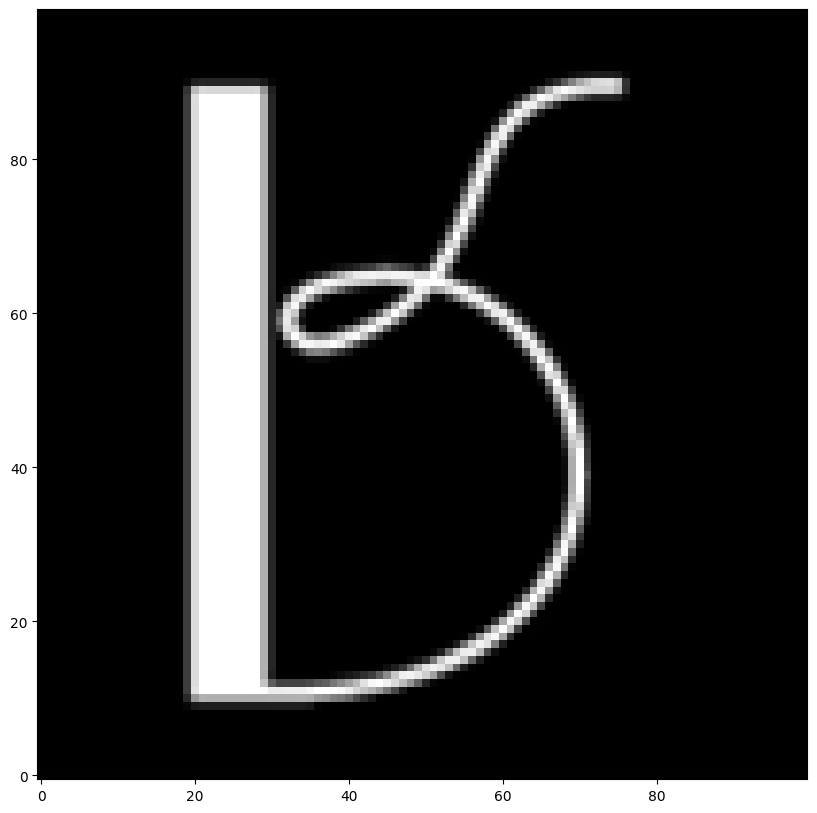

In [25]:
from PIL import Image

# Load the image
image = Image.open('letter_r.png').convert('L')

# Resize the image to a smaller size, e.g., 100x100
image = image.resize((100, 100))

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the image to the range [0, 1]
normalized_image = image_array / 255.0

# Display the normalized image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(normalized_image, cmap='gray', origin='lower')
plt.show()

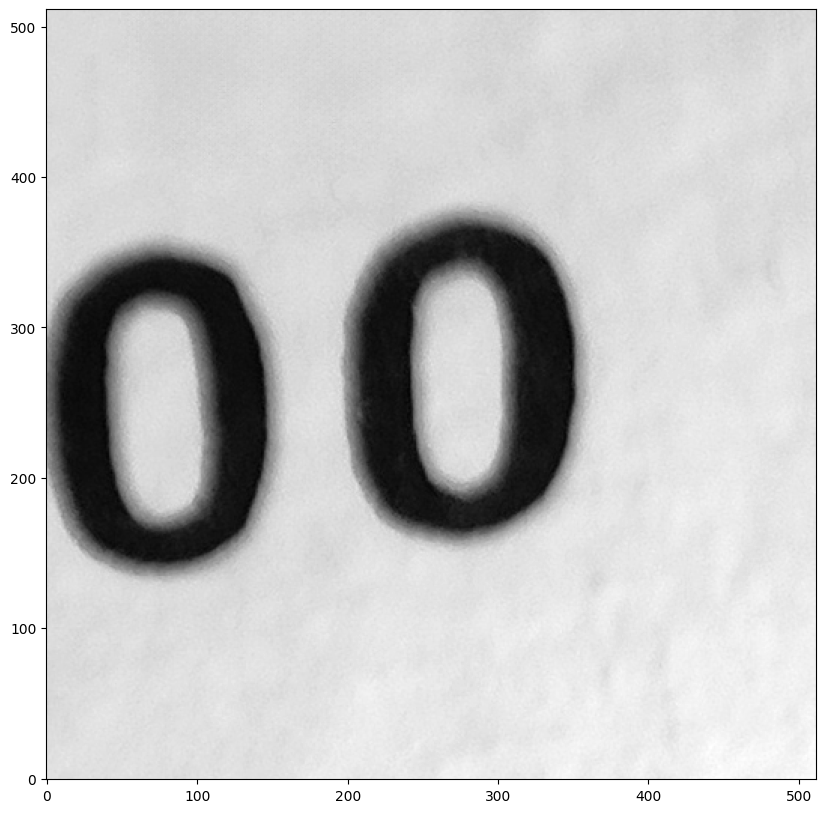

In [26]:
from PIL import Image

# Load the image
image = Image.open('ids_0049.jpg').convert('L')
# Display the normalized image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image, cmap='gray', origin='lower')
plt.show()

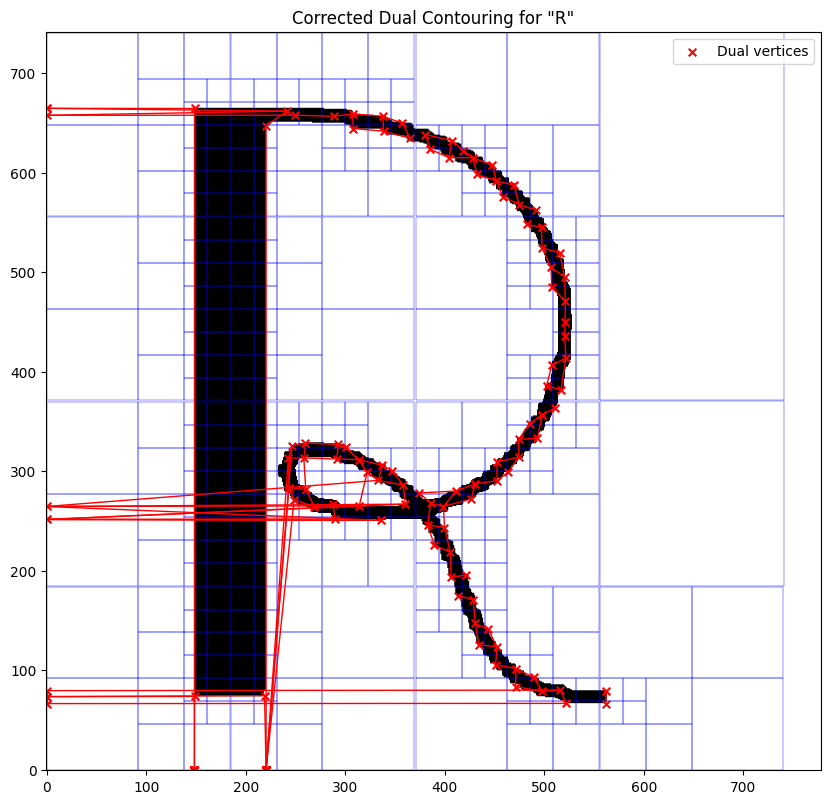

In [41]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import sobel

# 1. Load and binarize the image (flipped vertically)
image = np.array(Image.open('letter_r.png').convert('L'))
# image = image.resize((100, 100))
binary = (image < 128).astype(int)
binary = np.flipud(binary)  # Fix upside-down rotation

# 2. Compute gradients for normals
grad_x = sobel(binary.astype(float), axis=1)
grad_y = sobel(binary.astype(float), axis=0)
norms = np.sqrt(grad_x**2 + grad_y**2 + 1e-8)
grad_x /= norms
grad_y /= norms

# 3. Quadtree implementation
class QuadtreeNode:
    def __init__(self, x, y, size, depth=0):
        self.x = x
        self.y = y
        self.size = size
        self.depth = depth
        self.children = None
        self.vertex = None

    def subdivide(self, max_depth):
        if self.depth >= max_depth or self.size == 1:
            return
        x, y, size = self.x, self.y, self.size
        region = binary[y:y+size, x:x+size]
        if np.any(region != region[0,0]):
            half = size // 2
            self.children = [
                QuadtreeNode(x, y, half, self.depth+1),
                QuadtreeNode(x+half, y, half, self.depth+1),
                QuadtreeNode(x, y+half, half, self.depth+1),
                QuadtreeNode(x+half, y+half, half, self.depth+1)
            ]
            for child in self.children:
                child.subdivide(max_depth)

def interpolate_normal(x, y, grad_x, grad_y):
    x0, y0 = int(np.floor(x)), int(np.floor(y))
    dx, dy = x - x0, y - y0
    if x0+1 >= grad_x.shape[1] or y0+1 >= grad_x.shape[0]:
        return np.array([0.0, 0.0])
    return (1-dx)*(1-dy)*np.array([grad_x[y0,x0], grad_y[y0,x0]]) + \
           dx*(1-dy)*np.array([grad_x[y0,x0+1], grad_y[y0,x0+1]]) + \
           (1-dx)*dy*np.array([grad_x[y0+1,x0], grad_y[y0+1,x0]]) + \
           dx*dy*np.array([grad_x[y0+1,x0+1], grad_y[y0+1,x0+1]])

# 4. Build quadtree and compute vertices
max_depth = 5
root = QuadtreeNode(0, 0, binary.shape[0])
root.subdivide(max_depth)

# Collect leaves and compute vertices
leaves = []
leaf_dict = {}  # For neighbor checking

def collect_leaves(node):
    if node.children is None:
        leaves.append(node)
        leaf_dict[(node.x, node.y, node.size)] = node
    else:
        for child in node.children:
            collect_leaves(child)
collect_leaves(root)

for leaf in leaves:
    intersections = []
    x, y, size = leaf.x, leaf.y, leaf.size
    
    for j in range(y, y+size):
        for i in range(x, x+size):
            if i+1 < binary.shape[1] and binary[j,i] != binary[j,i+1]:
                mid_x, mid_y = i+0.5, j
                normal = interpolate_normal(mid_x, mid_y, grad_x, grad_y)
                if binary[j,i] == 0: normal *= -1
                intersections.append((np.array([mid_x, mid_y]), normal))
            if j+1 < binary.shape[0] and binary[j,i] != binary[j+1,i]:
                mid_x, mid_y = i, j+0.5
                normal = interpolate_normal(mid_x, mid_y, grad_x, grad_y)
                if binary[j,i] == 0: normal *= -1
                intersections.append((np.array([mid_x, mid_y]), normal))

    if intersections:
        A = np.array([n for _, n in intersections])
        b = np.array([np.dot(n, p) for p, n in intersections])
        try:
            leaf.vertex = np.linalg.lstsq(A, b, rcond=None)[0]
        except:
            leaf.vertex = None

# 5. Visualization with proper connections
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(binary, cmap='gray', origin='lower')  # Now correctly oriented

# Plot quadtree
def draw_quadtree(node):
    if node.children:
        for child in node.children:
            draw_quadtree(child)
    else:
        rect = plt.Rectangle((node.x, node.y), node.size, node.size, 
                            fill=False, edgecolor='blue', linewidth=0.3)
        ax.add_patch(rect)
draw_quadtree(root)

# Plot vertices and connect adjacent cells
vertices = []
for leaf in leaves:
    if leaf.vertex is not None:
        vertices.append(leaf.vertex)
        # Check right neighbor
        right_neighbor = leaf_dict.get((leaf.x + leaf.size, leaf.y, leaf.size))
        if right_neighbor and right_neighbor.vertex is not None:
            ax.plot([leaf.vertex[0], right_neighbor.vertex[0]],
                    [leaf.vertex[1], right_neighbor.vertex[1]], 'r-', lw=1)
        # Check bottom neighbor
        bottom_neighbor = leaf_dict.get((leaf.x, leaf.y + leaf.size, leaf.size))
        if bottom_neighbor and bottom_neighbor.vertex is not None:
            ax.plot([leaf.vertex[0], bottom_neighbor.vertex[0]],
                    [leaf.vertex[1], bottom_neighbor.vertex[1]], 'r-', lw=1)

ax.scatter([v[0] for v in vertices], [v[1] for v in vertices], 
           s=30, c='red', marker='x', label='Dual vertices')

plt.title('Corrected Dual Contouring for "R"')
plt.legend()
plt.show()